In [21]:

import math
import os
import re
import glob2

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#sns.set(rc={'figure.figsize':(20,10)})


In [22]:
import pandas as pd
dataframe= pd.read_csv('E:\Internship\Module 1\week2.csv')
dataframe


,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Year,Month,Day_Perc_Change,Trend
0,2019-10-24,299.68,298.97,304.74,290.05,29820000.0,2019,10,NaN,<function trend at 0x000002195E1F4798>
1,2019-10-23,254.68,254.50,256.14,251.35,11220000.0,2019,10,-0.150160,<function trend at 0x000002195E1F4798>
2,2019-10-22,255.58,254.32,258.33,250.85,4630000.0,2019,10,0.003534,<function trend at 0x000002195E1F4798>
3,2019-10-21,253.50,258.33,259.50,250.18,5110000.0,2019,10,-0.008138,<function trend at 0x000002195E1F4798>
4,2019-10-18,256.95,260.70,262.80,255.10,5750000.0,2019,10,0.013609,<function trend at 0x000002195E1F4798>
...,...,...,...,...,...,...,...,...,...,...
498,2017-10-31,331.53,320.23,331.95,320.18,5670000.0,2017,10,0.032546,<function trend at 0x000002195E1F4798>
499,2017-10-30,320.08,319.18,323.78,317.25,4250000.0,2017,10,-0.034537,<function trend at 0x000002195E1F4798>
500,2017-10-27,320.87,319.75,324.59,316.66,6980000.0,2017,10,0.002468,<function trend at 0x000002195E1F4798>
501,2017-10-26,326.17,327.78,330.23,323.20,5020000.0,2017,10,0.016518,<function trend at 0x000002195E1F4798>


In [23]:
type=dataframe.dtypes
type

Date                      object
Close Price              float64
Open Price               float64
High Price               float64
Low Price                float64
Total Traded Quantity    float64
Year                       int64
Month                      int64
Day_Perc_Change          float64
Trend                     object
dtype: object

In [24]:
dataframe['Date'] = pd.to_datetime(dataframe.Date)
print (dataframe)

          Date  Close Price  Open Price  High Price  Low Price  \
0   2019-10-24       299.68      298.97      304.74     290.05   
1   2019-10-23       254.68      254.50      256.14     251.35   
2   2019-10-22       255.58      254.32      258.33     250.85   
3   2019-10-21       253.50      258.33      259.50     250.18   
4   2019-10-18       256.95      260.70      262.80     255.10   
..         ...          ...         ...         ...        ...   
498 2017-10-31       331.53      320.23      331.95     320.18   
499 2017-10-30       320.08      319.18      323.78     317.25   
500 2017-10-27       320.87      319.75      324.59     316.66   
501 2017-10-26       326.17      327.78      330.23     323.20   
502 2017-10-25       325.84      336.70      337.50     323.56   

     Total Traded Quantity  Year  Month  Day_Perc_Change  \
0               29820000.0  2019     10              NaN   
1               11220000.0  2019     10        -0.150160   
2                4630000.0 

In [25]:
type=dataframe.dtypes
type

Date                     datetime64[ns]
Close Price                     float64
Open Price                      float64
High Price                      float64
Low Price                       float64
Total Traded Quantity           float64
Year                              int64
Month                             int64
Day_Perc_Change                 float64
Trend                            object
dtype: object

In [26]:
dataframe.set_index('Date', inplace=True, drop=False)

In [27]:
dataframe.head()


,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Year,Month,Day_Perc_Change,Trend
Date,,,,,,,,,,
2019-10-24,2019-10-24,299.68,298.97,304.74,290.05,29820000.0,2019,10,NaN,<function trend at 0x000002195E1F4798>
2019-10-23,2019-10-23,254.68,254.50,256.14,251.35,11220000.0,2019,10,-0.150160,<function trend at 0x000002195E1F4798>
2019-10-22,2019-10-22,255.58,254.32,258.33,250.85,4630000.0,2019,10,0.003534,<function trend at 0x000002195E1F4798>
2019-10-21,2019-10-21,253.50,258.33,259.50,250.18,5110000.0,2019,10,-0.008138,<function trend at 0x000002195E1F4798>
2019-10-18,2019-10-18,256.95,260.70,262.80,255.10,5750000.0,2019,10,0.013609,<function trend at 0x000002195E1F4798>


In [28]:

df_close_price_per_day = dataframe['Close Price'].groupby('Date').last().to_frame()
df_close_price_per_day['Date'] = df_close_price_per_day.index
df_close_price_per_day.head()

,Close Price,Date
Date,,
2017-10-25,325.84,2017-10-25
2017-10-26,326.17,2017-10-26
2017-10-27,320.87,2017-10-27
2017-10-30,320.08,2017-10-30
2017-10-31,331.53,2017-10-31


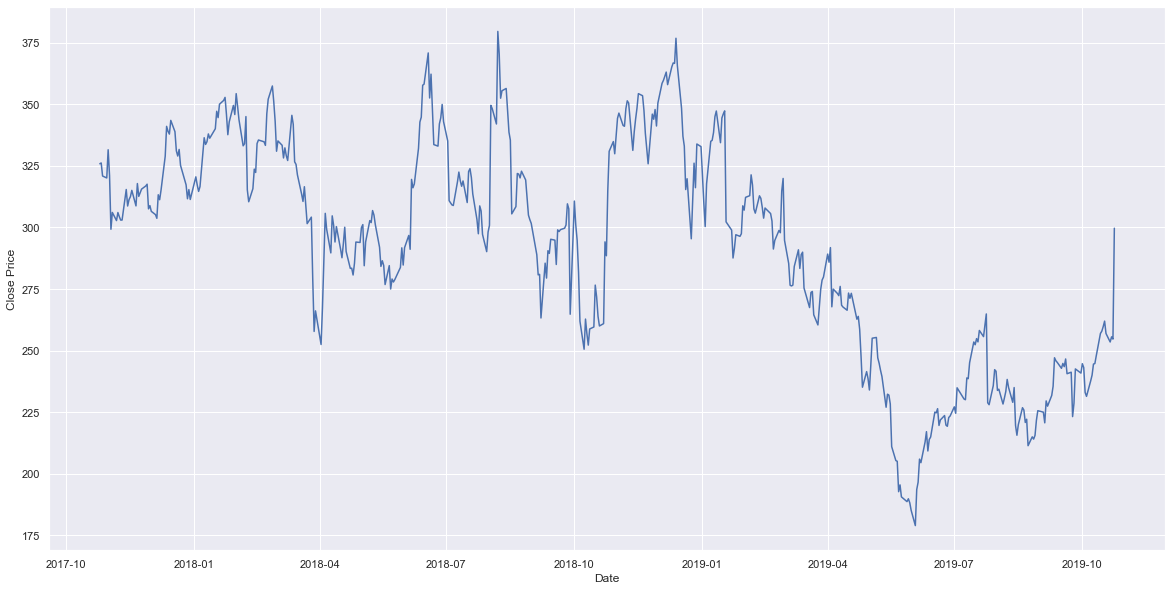

In [29]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x="Date", y="Close Price", data=df_close_price_per_day)

In [30]:
dataframe['Day_Perc_Change'].sort_values().head()


Date
2019-10-23   -0.150160
2018-09-28   -0.147827
2018-08-01   -0.139326
2018-10-22   -0.112837
2018-08-06   -0.099007
Name: Day_Perc_Change, dtype: float64

In [31]:
dataframe['Day_Perc_Change'].sort_values().tail()


Date
2018-08-16    0.098036
2019-01-17    0.149044
2019-07-24    0.157591
2018-09-27    0.161461
2019-10-24         NaN
Name: Day_Perc_Change, dtype: float64

<StemContainer object of 3 artists>

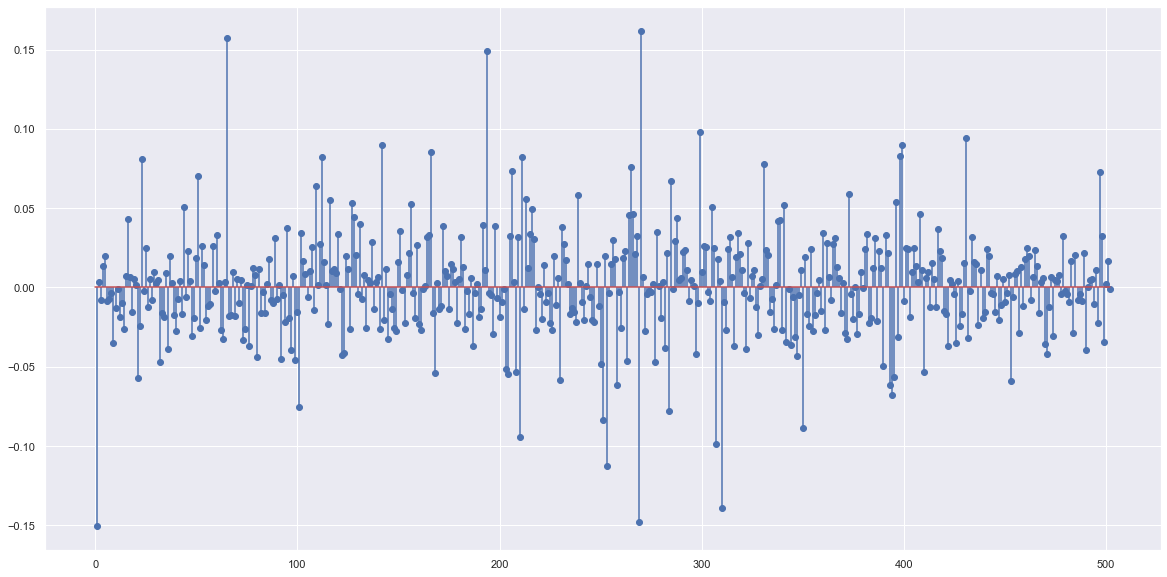

In [32]:
pyplot.stem(dataframe['Day_Perc_Change'], use_line_collection=True)


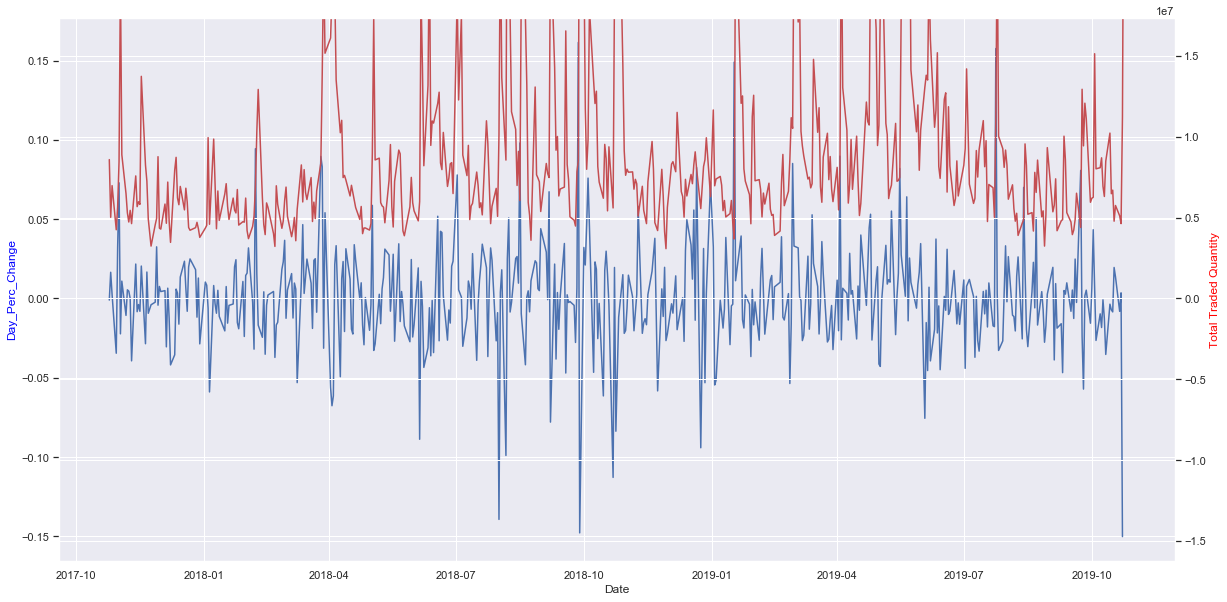

In [33]:
fig = pyplot.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

ax1.set_xlabel('Date')
ax2.set_ylabel('Total Traded Quantity', color='red')
ax2.plot(dataframe['Total Traded Quantity'], 'r-')

ax1.plot(dataframe['Day_Perc_Change'], 'b-')
ax1.set_ylabel('Day_Perc_Change', color='blue')

# SOURCE: https://stackoverflow.com/questions/10481990/matplotlib-axis-with-two-scales-shared-origin
def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)
align_yaxis(ax1, 0, ax2, 0)

In [34]:
dataframe['Day_Perc_Change'].describe()


count    502.000000
mean       0.000731
std        0.033641
min       -0.150160
25%       -0.016770
50%        0.001256
75%        0.017544
max        0.161461
Name: Day_Perc_Change, dtype: float64

In [43]:
trend_aggregation = dataframe.groupby('Trend').count()


In [45]:
trend_aggregation.index
fig, ax = pyplot.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

ax.pie( trend_aggregation, labels=trend_aggregation.index, autopct='%1.1f%%' )

ax.set_title("Trend Aggregation Pie Chart")
ax.legend(trend_aggregation.index,
          title="Trend",
          loc="center left",
          bbox_to_anchor=(1.1, 0, 0.5, 1))

pyplot.show()

Index(['<function trend at 0x000002195E1F4798>'], dtype='object', name='Trend')

In [61]:
volume_by_trend=dataframe.groupby(['Trend','Total Traded Quantity'])
volume_by_trend

In [64]:
volume_by_trend = dataframe.groupby('Trend', as_index=False)['Total Traded Quantity']


In [ ]:
fig, axes = pyplot.subplots(figsize=(30, 10), nrows=1, ncols=2)

axes[0].set_title("Mean Volume by Trend")
sns.barplot(ax=axes[0], x='Trend', y='Total_Traded_Quantity', data=volume_by_trend.mean().sort_values('Total_Traded_Quantity'));

axes[1].set_title("Median Volume by Trend")
sns.barplot(ax=axes[1], x='Trend', y='Total_Traded_Quantity', data=volume_by_trend.median().sort_values('Total_Traded_Quantity'));

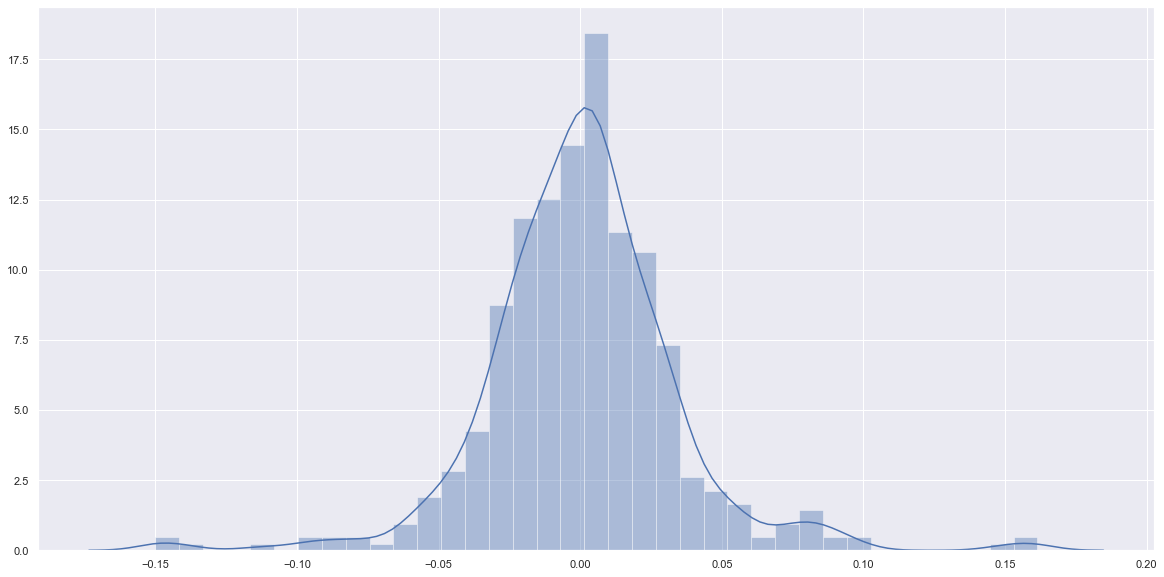

In [65]:
sns.distplot(dataframe['Day_Perc_Change'].tolist(), kde=True, rug=False);


In [134]:
#E:\Internship\Large_Cap\Large_Cap
filenames = glob2.glob(r"E:\Internship\Large_Cap\Large_Cap\*.csv")[0:5]
filenames = { re.sub('.*/([A-Z]+)\.csv', '\\1', filename): filename for filename in filenames }
filenames


{'E:\\Internship\\Large_Cap\\Large_Cap\\ADANIPORTS.csv': 'E:\\Internship\\Large_Cap\\Large_Cap\\ADANIPORTS.csv',
 'E:\\Internship\\Large_Cap\\Large_Cap\\ASIANPAINT.csv': 'E:\\Internship\\Large_Cap\\Large_Cap\\ASIANPAINT.csv',
 'E:\\Internship\\Large_Cap\\Large_Cap\\AXISBANK.csv': 'E:\\Internship\\Large_Cap\\Large_Cap\\AXISBANK.csv',
 'E:\\Internship\\Large_Cap\\Large_Cap\\BAJFINANCE.csv': 'E:\\Internship\\Large_Cap\\Large_Cap\\BAJFINANCE.csv',
 'E:\\Internship\\Large_Cap\\Large_Cap\\BPCL.csv': 'E:\\Internship\\Large_Cap\\Large_Cap\\BPCL.csv'}

In [101]:
def read_csv( filename ):
    dataframe = pd.read_csv(filename, parse_dates=['Date'])
    dataframe = dataframe[ dataframe['Series'] == 'EQ' ]
    dataframe.set_index('Date', inplace=True, drop=False)
    return dataframe
    
dataframes = { title: read_csv( filename ) for (title,filename) in filenames.items() }

In [102]:
correlation_df = pd.DataFrame(columns=dataframes.keys())
for (title,dataframe) in dataframes.items():
    correlation_df[title] = dataframe['Close Price']
    
correlation_df.head()

,E:\Internship\Large_Cap\Large_Cap\ADANIPORTS.csv,E:\Internship\Large_Cap\Large_Cap\ASIANPAINT.csv,E:\Internship\Large_Cap\Large_Cap\AXISBANK.csv,E:\Internship\Large_Cap\Large_Cap\BAJFINANCE.csv,E:\Internship\Large_Cap\Large_Cap\BPCL.csv
Date,,,,,
2017-05-15,356.20,1148.05,500.1,1332.95,727.85
2017-05-16,354.50,1142.85,501.5,1347.75,733.30
2017-05-17,348.55,1154.95,502.8,1324.80,727.45
2017-05-18,347.90,1151.35,492.0,1314.55,714.90
2017-05-19,349.45,1123.15,501.7,1289.15,702.45


In [103]:
correlation_df_pct = correlation_df.pct_change().dropna()
correlation_df_pct.head()


,E:\Internship\Large_Cap\Large_Cap\ADANIPORTS.csv,E:\Internship\Large_Cap\Large_Cap\ASIANPAINT.csv,E:\Internship\Large_Cap\Large_Cap\AXISBANK.csv,E:\Internship\Large_Cap\Large_Cap\BAJFINANCE.csv,E:\Internship\Large_Cap\Large_Cap\BPCL.csv
Date,,,,,
2017-05-16,-0.004773,-0.004529,0.002799,0.011103,0.007488
2017-05-17,-0.016784,0.010588,0.002592,-0.017028,-0.007978
2017-05-18,-0.001865,-0.003117,-0.021480,-0.007737,-0.017252
2017-05-19,0.004455,-0.024493,0.019715,-0.019322,-0.017415
2017-05-22,0.014308,-0.009438,0.001196,-0.036458,-0.009752


In [ ]:
sns.pairplot(correlation_df_pct)


In [ ]:
sns.pairplot(correlation_df)


In [108]:
dataframe

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,,
2017-05-15,BPCL,EQ,2017-05-15,733.15,734.65,736.00,723.00,729.00,727.85,728.22,839675,6.114684e+08,18823,289193,34.44
2017-05-16,BPCL,EQ,2017-05-16,727.85,727.00,735.00,723.00,733.25,733.30,729.34,871521,6.356351e+08,21083,282494,32.41
2017-05-17,BPCL,EQ,2017-05-17,733.30,732.90,734.00,723.50,727.05,727.45,727.80,1141029,8.304360e+08,35138,537536,47.11
2017-05-18,BPCL,EQ,2017-05-18,727.45,722.20,727.50,711.00,712.60,714.90,717.16,1047741,7.513945e+08,29422,351569,33.55
2017-05-19,BPCL,EQ,2017-05-19,714.90,715.25,722.45,700.00,703.50,702.45,709.17,1069546,7.584880e+08,44401,407185,38.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,BPCL,EQ,2019-05-07,390.35,388.45,388.45,372.10,380.00,378.85,377.34,7497322,2.829018e+09,90459,1364064,18.19
2019-05-08,BPCL,EQ,2019-05-08,378.85,378.05,383.40,373.10,376.40,379.80,379.30,3801308,1.441828e+09,58078,858245,22.58
2019-05-09,BPCL,EQ,2019-05-09,379.80,379.60,379.60,366.55,367.70,368.05,371.61,4513542,1.677287e+09,45216,790374,17.51


In [117]:
dataframe['Volatility'] = dataframe['Close Price'].pct_change().rolling(7).std() * np.sqrt(7)


In [118]:
correlation_volatility = correlation_df_pct.rolling(7).std() * np.sqrt(7)
correlation_volatility.tail()

,E:\Internship\Large_Cap\Large_Cap\ADANIPORTS.csv,E:\Internship\Large_Cap\Large_Cap\ASIANPAINT.csv,E:\Internship\Large_Cap\Large_Cap\AXISBANK.csv,E:\Internship\Large_Cap\Large_Cap\BAJFINANCE.csv,E:\Internship\Large_Cap\Large_Cap\BPCL.csv
Date,,,,,
2019-05-07,0.033656,0.030503,0.043093,0.030241,0.059997
2019-05-08,0.033689,0.030491,0.040909,0.041423,0.058001
2019-05-09,0.030381,0.033241,0.026683,0.047036,0.059885
2019-05-10,0.044862,0.024465,0.024534,0.047592,0.053258
2019-05-13,0.043365,0.024031,0.019364,0.044145,0.055215


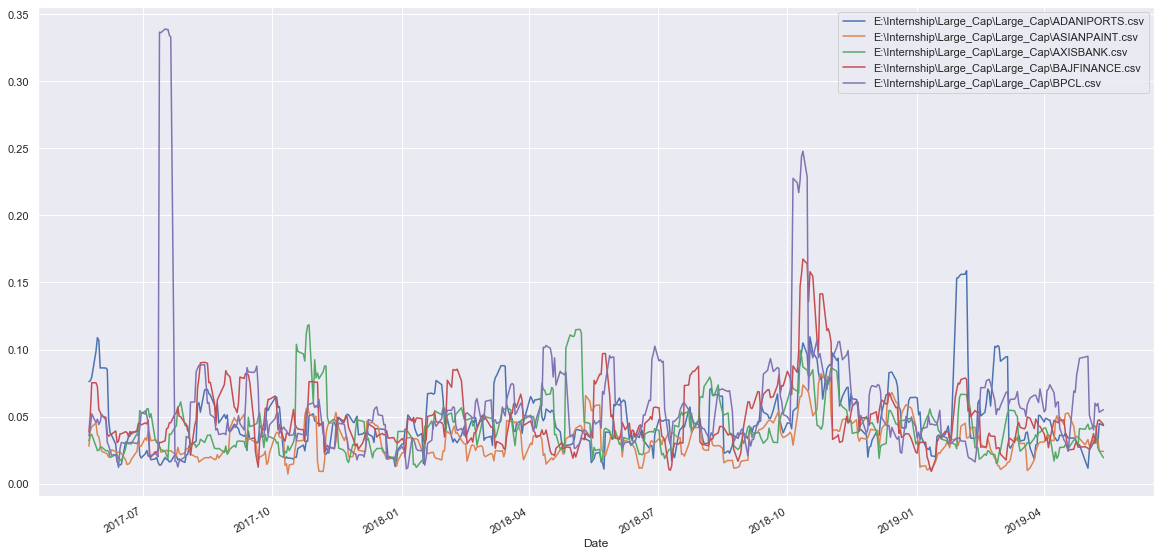

In [119]:
correlation_volatility.plot()


In [132]:
nifty = pd.read_csv(r"E:\Internship\Nifty50\Nifty50/Nifty50.csv")
nifty['Date'] = pd.to_datetime(nifty.Date)



In [133]:
nifty['Volatility'] = nifty.Close.pct_change().rolling(7).std() * np.sqrt(7)
nifty.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Volatility
489,2019-05-07,11651.50,11657.05,11484.45,11497.90,337495624,16632.84,0.017630
490,2019-05-08,11478.70,11479.10,11346.95,11359.45,372826025,17440.01,0.019601
491,2019-05-09,11322.40,11357.60,11255.05,11301.80,373028059,17602.86,0.012183
492,2019-05-10,11314.15,11345.80,11251.05,11278.90,387323416,18085.19,0.011545
493,2019-05-13,11258.70,11300.20,11125.60,11148.20,357586433,16722.91,0.011838


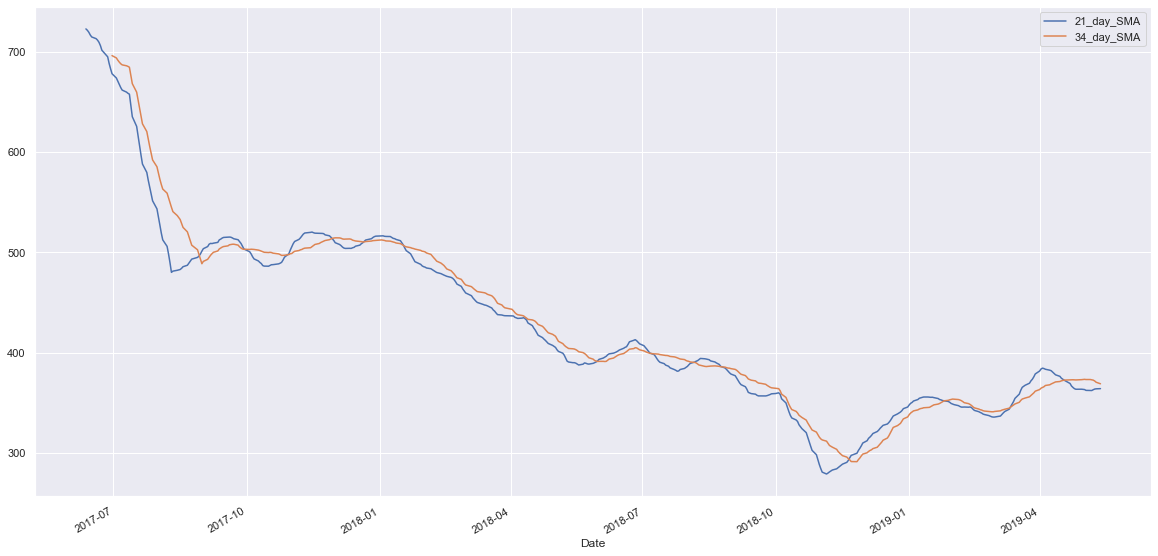

In [139]:
#dataframe['Volatility'] = dataframe['Close Price'].pct_change().rolling(7).std() * np.sqrt(7)
dataframe["21_day_SMA"] = dataframe['Close Price'].rolling(21).mean()
dataframe["34_day_SMA"] = dataframe['Close Price'].rolling(34).mean()
dataframe[["21_day_SMA", "34_day_SMA"]].plot()

In [140]:

prev_index       = dataframe.index[0]
prev_row         = dataframe[:prev_index]
short_sma_higher = prev_row["21_day_SMA"][0] > prev_row["34_day_SMA"][0]
dataframe['Trade_Call'] = 'HODL'

for index, row in dataframe.iterrows():
    if row["21_day_SMA"] and row["34_day_SMA"]:    
        if short_sma_higher       and row["21_day_SMA"] < row["34_day_SMA"]:
            result = "SELL"
        elif not short_sma_higher and row["21_day_SMA"] > row["34_day_SMA"]:
            result = "BUY"
        else:
            result = "HODL" 
        dataframe.at[index, 'Trade_Call'] = result
        short_sma_higher = row["21_day_SMA"] > row["34_day_SMA"]                        
    
signals = dataframe[["Close Price", "21_day_SMA", "34_day_SMA", "Trade_Call"]][ dataframe['Trade_Call'] != "HODL" ]
signals

,Close Price,21_day_SMA,34_day_SMA,Trade_Call
Date,,,,
2017-08-30,520.95,498.276190,493.070588,BUY
2017-10-03,478.85,500.433333,502.760294,SELL
2017-10-30,536.25,498.397619,497.638235,BUY
2017-11-29,507.80,513.388095,513.745588,SELL
2017-12-21,535.10,510.690476,510.291176,BUY
2018-01-18,470.25,504.173810,505.916176,SELL
2018-05-31,403.95,391.685714,391.105882,BUY
2018-07-09,376.30,397.969048,398.639706,SELL
2018-08-06,401.00,390.478571,390.188235,BUY


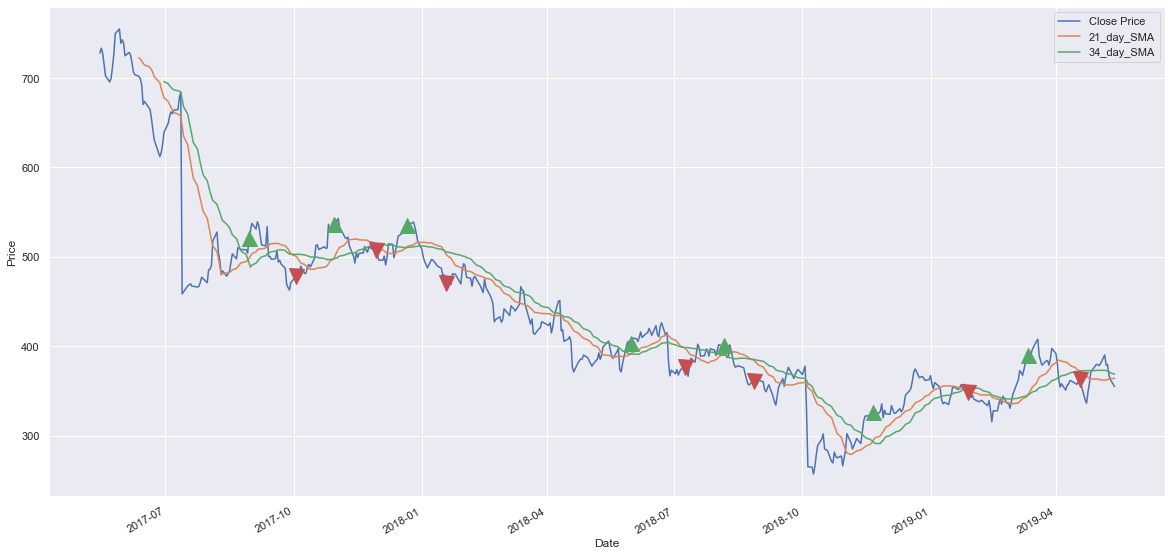

In [143]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111, ylabel="Price")

dataframe[["Close Price", "21_day_SMA", "34_day_SMA"]].plot(ax=ax1)

ax1.plot( dataframe["Close Price"][ dataframe['Trade_Call'] == 'BUY' ].index, 
          dataframe["Close Price"][ dataframe['Trade_Call'] == 'BUY' ], 
          '^', markersize=15, color='g' )

ax1.plot( dataframe["Close Price"][ dataframe['Trade_Call'] == 'SELL' ].index, 
          dataframe["Close Price"][ dataframe['Trade_Call'] == 'SELL' ], 
          'v', markersize=15, color='r' )

In [145]:
bank = {
    "start_dollars": 100000,
    "dollars":       100000,
    "stock":         0
}

for index, row in signals.iterrows():
    if row['Trade_Call'] == "BUY":
        buy_amount        = row['Close Price'] / bank['dollars']
        bank['stock']    += buy_amount 
        bank['dollars']  -= buy_amount * row['Close Price'] 
    
    if row['Trade_Call'] == "SELL" or index == signals[-1:].index[0]:
        sell_amount       = bank['stock']
        bank['stock']    -= sell_amount 
        bank['dollars']  += sell_amount * row['Close Price'] 
        
bank['profit'] = bank['dollars'] / bank['dollars']
bank

{'start_dollars': 100000,
 'dollars': 99998.9768678953,
 'stock': 0.0,
 'profit': 1.0}

In [147]:
dataframe["14_day_SMA"] = dataframe['Close Price'].rolling(14).mean()
dataframe["14_day_STD"] = dataframe['Close Price'].rolling(14).std()
dataframe["14_day_bollinger_upper"] = dataframe["14_day_SMA"] + dataframe["14_day_STD"] * 2
dataframe["14_day_bollinger_lower"] = dataframe["14_day_SMA"] - dataframe["14_day_STD"] * 2

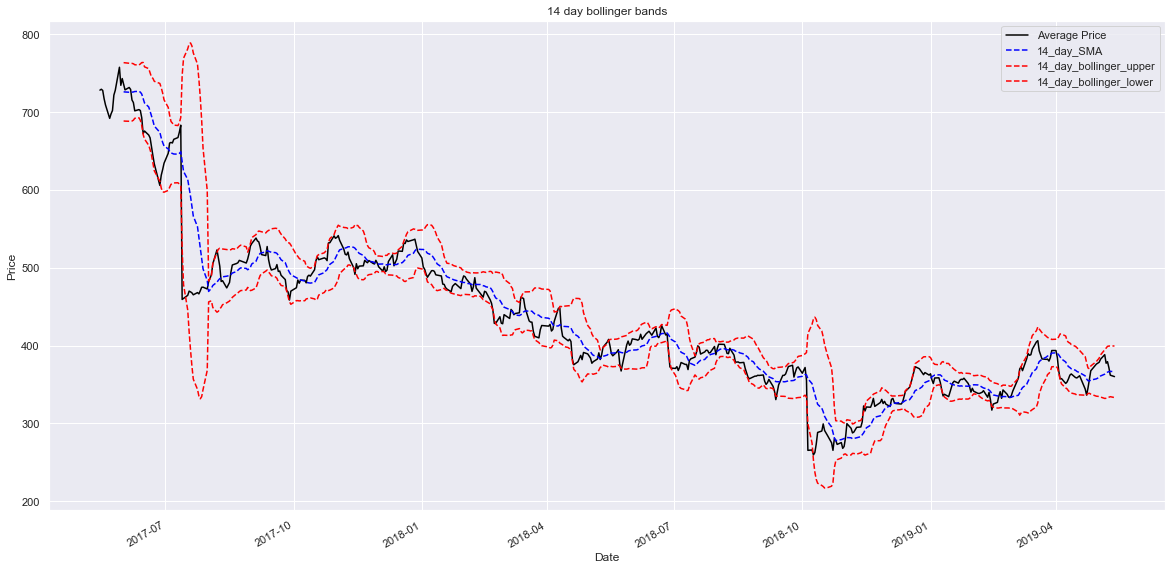

In [149]:
ax = plt.gca()

dataframe.plot(kind='line',x='Date', y='Average Price', ax=ax, color='black')
dataframe.plot(kind='line',x='Date', y='14_day_SMA',    ax=ax, color='blue', linestyle='--')
dataframe.plot(kind='line',x='Date', y='14_day_bollinger_upper',    ax=ax, color='red', linestyle='--')
dataframe.plot(kind='line',x='Date', y='14_day_bollinger_lower',    ax=ax, color='red', linestyle='--')


plt.title("14 day bollinger bands")
plt.ylabel("Price")
plt.show()

In [150]:


dataframe.to_csv (r'E:\Internship\week3.csv', index = False, header=True)